In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

df = pd.read_csv('matchups_20.csv')
df = df[df['round'] == 'Second Round']
print(df.shape)
df.head()

(320, 35)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,kenpom_adjem,kenpom_adjoe,...,off_ft_pct,off_block_pct,def_2pt_pct,def_3pt_pct,def_ft_pct,def_block_pct,off_ast_rate,off_stl_rate,def_ast_rate,def_stl_rate
1,2004,East,Second Round,1,2004 Saint Joseph's,8,2004 Texas Tech,1,11.7131,82.5819,...,36.8050,84.5246,5.1594,38.3150,-43.5228,-83.9574,10.0373,99.7747,-8.3934,-99.7847
3,2004,East,Second Round,12,2004 Manhattan,4,2004 Wake Forest,0,-10.7518,76.1598,...,46.2060,79.1674,2.6516,29.1452,-40.8626,-81.4092,-1.5225,99.7573,-5.7294,-99.7894
6,2004,East,Second Round,7,2004 Memphis,2,2004 Oklahoma St.,0,-8.7899,74.5241,...,31.4505,78.9229,1.5049,27.2663,-39.2292,-82.9583,12.5446,99.8021,-15.5056,-99.7948
11,2004,East,Second Round,6,2004 Wisconsin,3,2004 Pittsburgh,0,-1.4764,73.7798,...,36.0207,85.2679,1.9997,35.5489,-35.7741,-79.6581,9.1515,99.8058,-5.9164,-99.8198
17,2004,Midwest,Second Round,6,2004 Boston College,3,2004 Georgia Tech,0,-10.2469,69.4213,...,34.4416,83.9869,4.1489,31.4323,-40.0501,-80.5235,19.5497,99.7939,-9.3216,-99.7668


In [15]:
df['win'].value_counts(normalize=True)

1    0.50625
0    0.49375
Name: win, dtype: float64

In [16]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'off_eff', 'def_eff', 'tempo',
       'adj_tempo', 'off_efg_pct', 'off_to_pct', 'off_or_pct', 'off_ft_rate',
       'def_efg_pct', 'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_2pt_pct',
       'off_3pt_pct', 'off_ft_pct', 'off_block_pct', 'def_2pt_pct',
       'def_3pt_pct', 'def_ft_pct', 'def_block_pct', 'off_ast_rate',
       'off_stl_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')

In [17]:
split_df = df.drop(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team', 'low_bracket_seed', 'low_bracket_team'],axis=1)
print(split_df.shape)
split_df.head()

(320, 28)


,win,kenpom_adjem,kenpom_adjoe,kenpom_adjde,off_eff,def_eff,tempo,adj_tempo,off_efg_pct,off_to_pct,...,off_ft_pct,off_block_pct,def_2pt_pct,def_3pt_pct,def_ft_pct,def_block_pct,off_ast_rate,off_stl_rate,def_ast_rate,def_stl_rate
1,1,11.7131,82.5819,-70.8690,75.3604,-75.3604,-1.4286,-0.3618,4.7487,58.6804,...,36.8050,84.5246,5.1594,38.3150,-43.5228,-83.9574,10.0373,99.7747,-8.3934,-99.7847
3,0,-10.7518,76.1598,-86.9114,72.2205,-72.2205,-5.2867,-5.2740,0.8281,58.7736,...,46.2060,79.1674,2.6516,29.1452,-40.8626,-81.4092,-1.5225,99.7573,-5.7294,-99.7894
6,0,-8.7899,74.5241,-83.3145,72.7563,-72.7563,1.4590,1.8076,-4.4364,59.4922,...,31.4505,78.9229,1.5049,27.2663,-39.2292,-82.9583,12.5446,99.8021,-15.5056,-99.7948
11,0,-1.4764,73.7798,-75.2564,73.7650,-73.7650,0.3431,0.9595,-6.8017,64.1033,...,36.0207,85.2679,1.9997,35.5489,-35.7741,-79.6581,9.1515,99.8058,-5.9164,-99.8198
17,0,-10.2469,69.4213,-79.6684,72.0727,-72.0727,-8.0060,-6.6816,-7.1736,56.8739,...,34.4416,83.9869,4.1489,31.4323,-40.0501,-80.5235,19.5497,99.7939,-9.3216,-99.7668


In [18]:
split_df.columns

Index(['win', 'kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate'],
      dtype='object')

In [19]:
X = split_df.drop('win', axis=1)
X = split_df[['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate']]
Y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(224, 28)
(96, 28)


## I. Filter Methods

### A. Box Plots

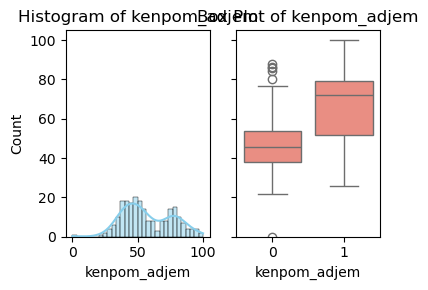

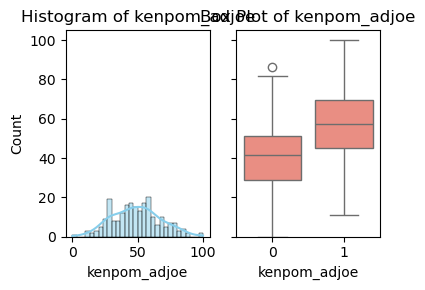

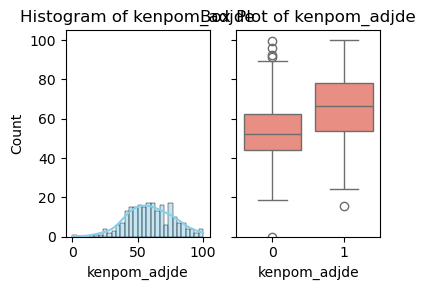

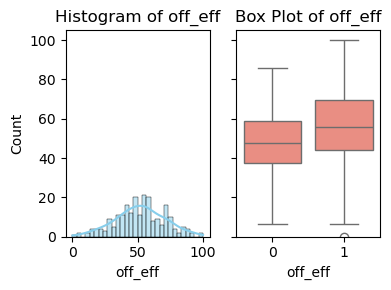

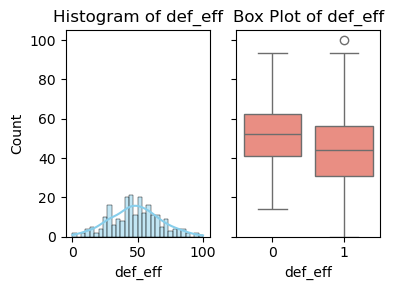

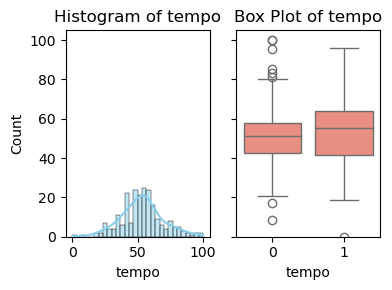

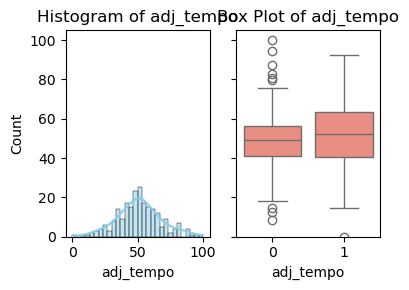

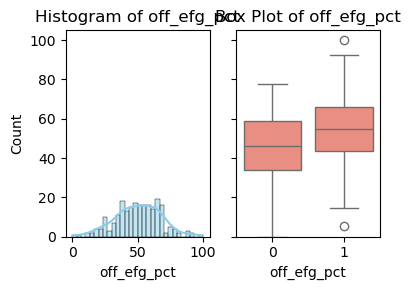

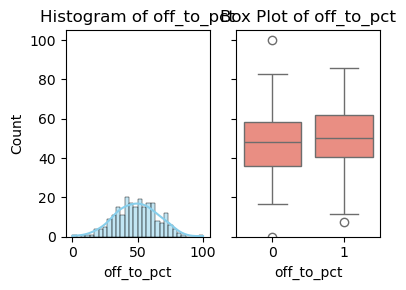

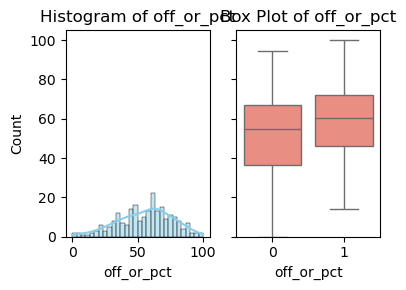

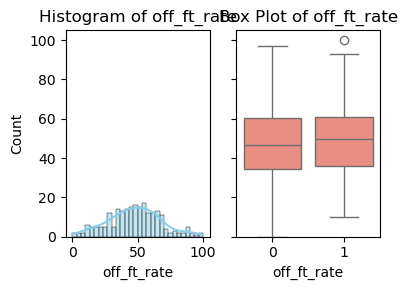

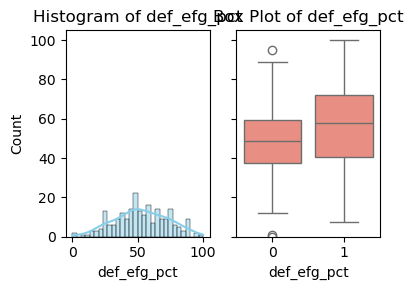

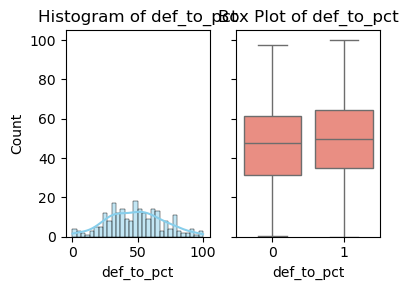

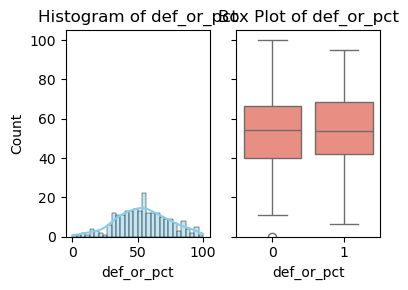

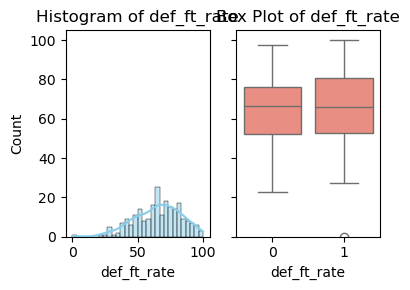

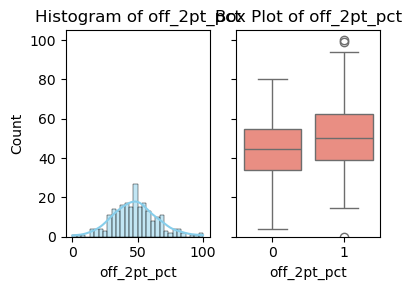

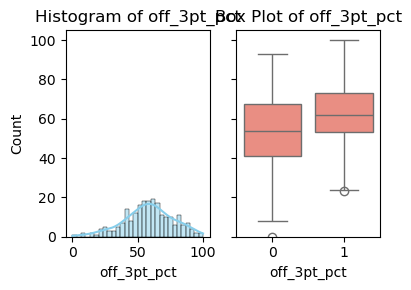

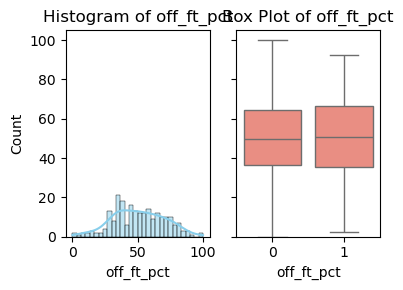

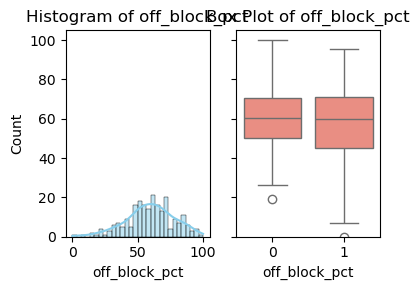

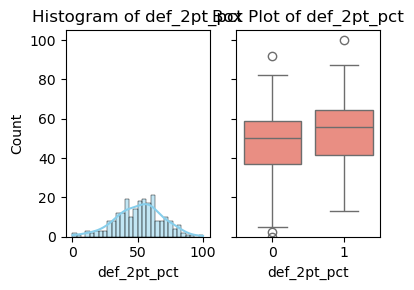

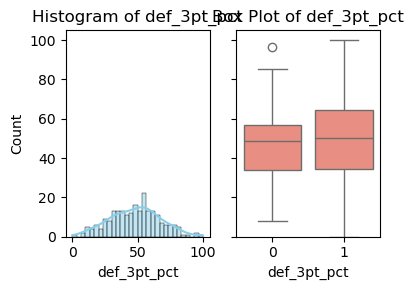

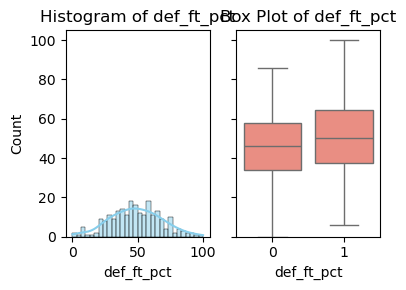

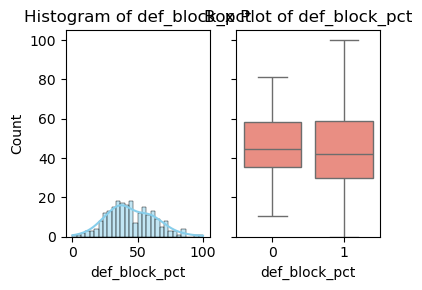

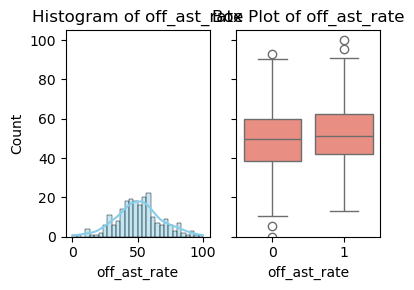

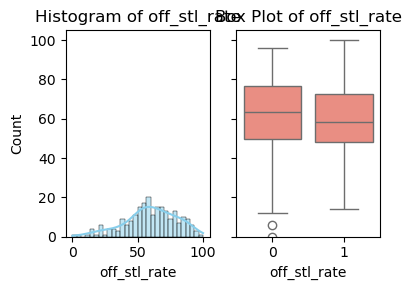

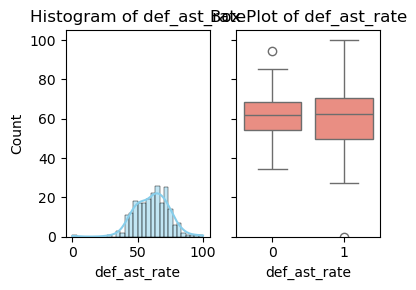

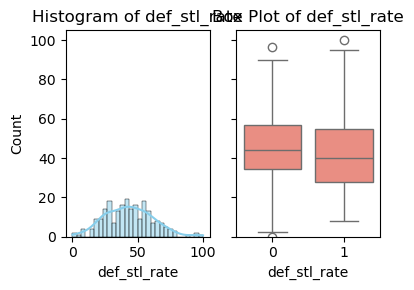

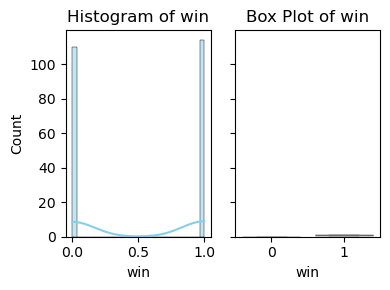

In [20]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_df
numeric_columns = train_df.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

### B. Correlation

In [21]:
corr_matrix = train_df.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

kenpom_adjem      53.00
kenpom_adjoe      42.27
kenpom_adjde      32.44
off_eff           18.94
def_eff           18.94
adj_tempo         10.25
off_efg_pct       26.60
off_or_pct        18.02
def_efg_pct       17.91
off_2pt_pct       19.78
off_3pt_pct       25.15
off_block_pct     10.63
def_2pt_pct       17.68
def_ft_pct        12.18
off_ast_rate      12.58
win              100.00
Name: win, dtype: float64


### C. Statistical Tests

In [22]:
X = train_df[['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct',
       'def_block_pct', 'off_ast_rate', 'off_stl_rate', 'def_ast_rate',
       'def_stl_rate']]
#X = train_df.drop('win', axis=1)
y = train_df['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,86.704595,1.273769e-17,0.162658
1,kenpom_adjoe,48.294674,4.026829e-11,0.160805
2,kenpom_adjde,26.114874,6.929700e-07,0.060773
3,off_eff,8.261671,4.442527e-03,0.038014
4,def_eff,8.261671,4.442527e-03,0.038014
5,tempo,1.334808,2.491936e-01,0.000000
6,adj_tempo,2.354968,1.263084e-01,0.033482
7,off_efg_pct,16.905996,5.531176e-05,0.079443
8,off_to_pct,0.816565,3.671659e-01,0.000000
9,off_or_pct,7.453392,6.839825e-03,0.000000


In [23]:
stats_df[stats_df['mutual_info'] > 0]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,86.704595,1.273769e-17,0.162658
1,kenpom_adjoe,48.294674,4.026829e-11,0.160805
2,kenpom_adjde,26.114874,6.929700e-07,0.060773
3,off_eff,8.261671,4.442527e-03,0.038014
4,def_eff,8.261671,4.442527e-03,0.038014
6,adj_tempo,2.354968,1.263084e-01,0.033482
7,off_efg_pct,16.905996,5.531176e-05,0.079443
10,off_ft_rate,0.325043,5.691690e-01,0.029982
11,def_efg_pct,7.359001,7.195855e-03,0.006943
13,def_or_pct,0.088193,7.667654e-01,0.012063


In [24]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,86.704595,1.273769e-17,0.162658
1,kenpom_adjoe,48.294674,4.026829e-11,0.160805
2,kenpom_adjde,26.114874,6.929700e-07,0.060773
3,off_eff,8.261671,4.442527e-03,0.038014
4,def_eff,8.261671,4.442527e-03,0.038014
7,off_efg_pct,16.905996,5.531176e-05,0.079443
9,off_or_pct,7.453392,6.839825e-03,0.000000
11,def_efg_pct,7.359001,7.195855e-03,0.006943
15,off_2pt_pct,9.043858,2.939538e-03,0.057637
16,off_3pt_pct,14.991434,1.420706e-04,0.050825


In [25]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,kenpom_adjem,86.704595,1.273769e-17,0.162658
1,kenpom_adjoe,48.294674,4.026829e-11,0.160805
2,kenpom_adjde,26.114874,6.929700e-07,0.060773
3,off_eff,8.261671,4.442527e-03,0.038014
4,def_eff,8.261671,4.442527e-03,0.038014
7,off_efg_pct,16.905996,5.531176e-05,0.079443
9,off_or_pct,7.453392,6.839825e-03,0.000000
11,def_efg_pct,7.359001,7.195855e-03,0.006943
15,off_2pt_pct,9.043858,2.939538e-03,0.057637
16,off_3pt_pct,14.991434,1.420706e-04,0.050825


## II. Wrapper Methods

### A. Forward Selection

In [26]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### B. Recursive Feature Elimination

In [27]:
# Convert scaled data back to DataFrame to keep track of column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize RFE with logistic regression as the model and the number of features to select
rfe = RFE(estimator=log_reg, n_features_to_select=12)  # Select top 12 features

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features (column names)
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train a logistic regression model using only the selected features
log_reg.fit(X_train_scaled[selected_features], y_train)

# Make predictions on both training and testing datasets
y_train_pred = log_reg.predict(X_train_scaled[selected_features])
y_test_pred = log_reg.predict(X_test_scaled[selected_features])

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

Selected Features: Index(['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff', 'def_eff',
       'tempo', 'adj_tempo', 'def_efg_pct', 'def_or_pct', 'def_2pt_pct',
       'def_3pt_pct', 'def_ast_rate'],
      dtype='object')
F1 Score on Training Set: 0.751131221719457
F1 Score on Test Set: 0.7311827956989247


### C. Lasso Regression

In [28]:
# Create a Lasso Logistic Regression model (penalty='l1' for Lasso)
lasso_log_reg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# Fit the model on the training data
lasso_log_reg.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = lasso_log_reg.predict(X_train_scaled)
y_test_pred = lasso_log_reg.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get the non-zero coefficients (selected features) from the Lasso model
selected_features = X.columns[(lasso_log_reg.coef_ != 0).flatten()]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 0.7579908675799086
F1 Score on Test Set: 0.7311827956989247
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'kenpom_adjde', 'off_eff', 'def_eff', 'tempo',
       'adj_tempo', 'off_to_pct', 'off_or_pct', 'off_ft_rate', 'def_efg_pct',
       'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_3pt_pct', 'off_ft_pct',
       'off_block_pct', 'def_3pt_pct', 'def_ft_pct', 'def_block_pct',
       'off_ast_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')


## III. Tree Methods

### A. Decision Tree Information Gain

In [29]:
X_train_scaled = scaler.fit_transform(X_train)  # Scaled training features
X_test_scaled = scaler.transform(X_test)  # Scaled test features

# Create a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = decision_tree.feature_importances_

# Get the selected features based on their importance (non-zero importance)
selected_features = X.columns[feature_importances > 0]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.6862745098039215
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'kenpom_adjoe', 'off_eff', 'adj_tempo', 'off_to_pct',
       'off_or_pct', 'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_2pt_pct',
       'off_3pt_pct', 'off_block_pct', 'def_3pt_pct', 'def_block_pct',
       'off_ast_rate', 'off_stl_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')


### B. Random Forest

In [30]:
# Create a Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = random_forest.predict(X_train_scaled)
y_test_pred = random_forest.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = random_forest.feature_importances_

# Get the columns (features) that were selected (those with non-zero importance)
selected_features = X.columns[feature_importances > .02]
print("Selected Features (Columns used in the model):", selected_features)

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.6813186813186812
Selected Features (Columns used in the model): Index(['kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff', 'def_eff',
       'tempo', 'adj_tempo', 'off_efg_pct', 'off_to_pct', 'off_or_pct',
       'off_ft_rate', 'def_efg_pct', 'def_or_pct', 'def_ft_rate',
       'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct', 'off_block_pct',
       'def_2pt_pct', 'def_3pt_pct', 'def_ft_pct', 'def_block_pct',
       'off_ast_rate', 'off_stl_rate', 'def_ast_rate', 'def_stl_rate'],
      dtype='object')


### C. Extra Tree

In [31]:
# Create an Extra Trees Classifier model
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
extra_trees.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = extra_trees.predict(X_train_scaled)
y_test_pred = extra_trees.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Output the F1 scores
print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

# Get feature importances (information gain)
feature_importances = extra_trees.feature_importances_

F1 Score on Training Set: 1.0
F1 Score on Test Set: 0.6956521739130435


In [32]:
column_names = X_train.columns
tree_df = pd.DataFrame({
    'feature': column_names,
    'importance': feature_importances
})
tree_df
#tree_df.to_csv('tree.csv')

,feature,importance
0,kenpom_adjem,0.112067
1,kenpom_adjoe,0.074720
2,kenpom_adjde,0.056304
3,off_eff,0.037271
4,def_eff,0.040047
5,tempo,0.030267
6,adj_tempo,0.028209
7,off_efg_pct,0.039020
8,off_to_pct,0.028483
9,off_or_pct,0.029460


# IV. Exhaustive Feature Selection

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled2 = X_train_scaled[[
'kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'def_2pt_pct', 'def_3pt_pct', 'def_block_pct'
]]

X_test_scaled2 = X_test_scaled[[
'kenpom_adjem', 'kenpom_adjoe', 'kenpom_adjde', 'off_eff',
       'def_eff', 'adj_tempo', 'off_efg_pct', 'off_to_pct',
       'off_or_pct', 'off_ft_rate', 'def_efg_pct', 'def_to_pct', 'def_or_pct',
       'def_ft_rate', 'off_2pt_pct', 'off_3pt_pct', 'off_ft_pct',
       'def_2pt_pct', 'def_3pt_pct', 'def_block_pct'
]]

In [34]:
# Initialize variables to track the best model
best_f1 = 0
best_features = []
best_train_f1 = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_features = subset
            best_train_f1 = train_f1

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test F1 Score: {best_f1:.4f}")
print(f"Training F1 Score of Best Model: {best_train_f1:.4f}")

Best Feature Subset: ('kenpom_adjem', 'kenpom_adjde', 'off_efg_pct', 'off_or_pct', 'off_ft_rate', 'def_to_pct', 'def_or_pct', 'def_ft_rate', 'off_3pt_pct', 'def_3pt_pct', 'def_block_pct')
Best Test F1 Score: 0.7742
Training F1 Score of Best Model: 0.7671


### V. Principal Components Analysis

In [41]:
from sklearn.decomposition import PCA
import plotly_express as px
import plotly.graph_objects as go


In [42]:
shape = X_train_scaled2.shape
pca = PCA(n_components=shape[1])
pca_array2 = pca.fit_transform(X_train_scaled2)

Explained variance:  [5.79448454e+00 3.52336150e+00 2.08549594e+00 1.39028886e+00
 1.10545314e+00 1.01514745e+00 9.57087798e-01 7.95542470e-01
 7.01020014e-01 6.46523504e-01 5.80050294e-01 4.74976346e-01
 4.17598470e-01 3.60188336e-01 1.69127855e-01 6.70630441e-02
 3.68117133e-03 2.59536199e-03 8.15699641e-10 5.44763974e-33]
Explained variance ratio:  [2.88430815e-01 1.75381610e-01 1.03809285e-01 6.92041108e-02
 5.50259041e-02 5.05307770e-02 4.76407542e-02 3.95995470e-02
 3.48945230e-02 3.21818619e-02 2.88730392e-02 2.36427958e-02
 2.07867096e-02 1.79290176e-02 8.41864102e-03 3.33818277e-03
 1.83236876e-04 1.29188777e-04 4.06029062e-11 2.71165996e-34]
Cumulative explained variance ratio:  [0.28843082 0.46381243 0.56762171 0.63682582 0.69185173 0.7423825
 0.79002326 0.8296228  0.86451733 0.89669919 0.92557223 0.94921502
 0.97000173 0.98793075 0.99634939 0.99968757 0.99987081 1.
 1.         1.        ]


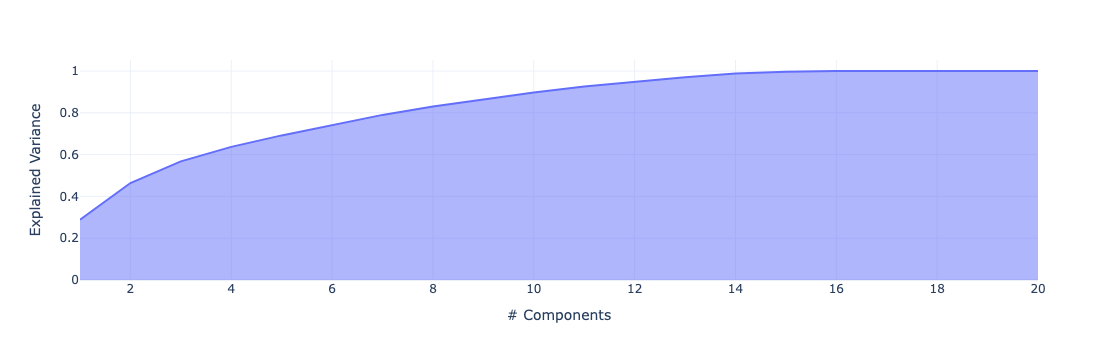

In [43]:
### Explained Variance ###
print("Explained variance: ", pca.explained_variance_)
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio: ", np.cumsum(pca.explained_variance_ratio_))

### Visualize ###
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x = range(1, exp_var_cumul.shape[0] + 1),
    y = exp_var_cumul,
    template = "plotly_white",
    labels = {"x": "# Components",
              "y": "Explained Variance"})

In [49]:
# PCA on training set
pca_train = pd.DataFrame(pca_array2)
pca_train = pca_train.loc[:, 0:3]
pca_train.columns = ['PC1', 'PC2', 'PC3', 'PC4']
# Run Logistic Regression on PCA dataframe
model = LogisticRegression()
model.fit(pca_train, y_train)
y_train_pred = model.predict(pca_train)
f1_train = f1_score(y_train, y_train_pred)
f1_train

0.7161572052401747

In [39]:
# PCA on training set
pca_test_array = pca.transform(X_test_scaled)
pca_test_df = pd.DataFrame(pca_test_array)
pca_test = pca_test_df.loc[:, 0:2]
pca_test.columns = ['PC1', 'PC2', 'PC3']
# Run Logistic Regression on PCA dataframe
y_test_pred = model.predict(pca_test)
f1_test = f1_score(y_test, y_test_pred)
f1_test

0.6595744680851064